# Small project: Fix real adtech data


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv(r'C:\Users\simao\Desktop\Pos-Graduação em Data Science, Business Analytics e AI\Data Engineering\project\small_project\small_project\data-engineering-project\real_data_ads.csv')
df.dtypes

C:\Users\simao\AppData\Local\Temp\ipykernel_4776\739179497.py:4: DtypeWarning: Columns (1,4,6,7,19,20,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\simao\Desktop\Pos-Graduação em Data Science, Business Analytics e AI\Data Engineering\project\small_project\small_project\data-engineering-project\real_data_ads.csv')


Unnamed: 0.1               int64
Unnamed: 0                object
event_datetime            object
asi_0                     object
advertiser_id             object
line_item_id              object
creative_id               object
pub_network_id            object
publisher_id_str          object
impression_id             object
request_datetime          object
requested_content_type    object
requested_size            object
publisher_bundle          object
country                   object
city                      object
os_name                   object
os_version                object
device_type               object
auction_type              object
is_install                object
advertiser_bundle         object
source                    object
bid_amount                object
user_hour                 object
dtype: object

In [2]:
df.head()

,Unnamed: 0.1,Unnamed: 0,event_datetime,asi_0,advertiser_id,line_item_id,creative_id,pub_network_id,publisher_id_str,impression_id,request_datetime,requested_content_type,requested_size,publisher_bundle,country,city,os_name,os_version,device_type,auction_type,is_install,advertiser_bundle,source,bid_amount,user_hour
0,0,8938815,2025-02-18 02:20:08,taboola.com,88370163.0,88513106,88319811,88445356,1470812,5eb200b3-acd9-4bb0-9ee8-c2eef5d3b78e,2025-02-18 02:20:05,native,400x250,420520635,US,Temple,iOS,iOS_18,Phone,1.0,0.0,407690035,legacy,0.0001199999969685,20.0
1,1,20641970,2025-02-14 18:27:20,inmobi.com,88370137.0,88373789,88101180,83657481,dfe1f5bcc944456992197efe8cfce879,5463e8dd-a0d1-4d25-baa5-00434c9e518e,2025-02-14 18:27:16,html,320x50,1617391485,US,Hamden,iOS,iOS_18,Phone,1.0,0.0,359917414,legacy,0.0002462754200678,13.0
2,2,29601533,2025-02-12 02:28:27,taboola.com,87038592.0,88079133,87888101,75444072,1100047487,57f88165-f099-448d-ab72-e936443ee748,2025-02-12 02:28:25,native,393x327,317469184,US,Athens,iOS,iOS_18,Phone,1.0,0.0,359917414,legacy,0.0001466089015593,21.0
3,3,25046340,2025-02-23 11:51:06,fyber.com,88464991.0,88465227,88465210,75437127,1007055,204ccb83-e4b4-40e3-9eba-1c47e6706546,2025-02-23 11:50:58,native,1200x627,1554443694,JP,Okayama,iOS,iOS_18,Phone,1.0,0.0,6445905219,legacy,5.958720066701062e-05,20.0
4,4,20084110,2025-02-13 17:59:14,inmobi.com,88370119.0,88487508,88101192,86309888,15290,bb448cbf-32ad-478b-bcbc-722d696c5363,2025-02-13 17:59:11,html,320x50,6446084109,US,Philadelphia,iOS,iOS_17,Phone,1.0,0.0,359917414,legacy,0.0003449345531407,12.0


In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,1055871.0,NaN,NaN,NaN,527935.0,304803.847377,0.0,263967.5,527935.0,791902.5,1055870.0
event_datetime,1055131,685132,none,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asi_0,1044154,143,taboola.com,278790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
advertiser_id,1055178,141,88460206.0,131451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
line_item_id,1055134,542,88464518,46756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creative_id,1055137,1357,88411822,63143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pub_network_id,1055168,57,86452228,415187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publisher_id_str,1055143,4888,2993689,120505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
impression_id,1055213,1055095,none,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
request_datetime,1055162,685425,Null,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df[df.is_install==0].head()

,Unnamed: 0.1,event_datetime,asi_0,advertiser_id,line_item_id,creative_id,pub_network_id,publisher_id_str,impression_id,request_datetime,requested_content_type,requested_size,publisher_bundle,country,city,os_name,os_version,device_type,auction_type,is_install,advertiser_bundle,source,bid_amount,user_hour
851968,851968,2025-02-23 00:38:58,taboola.com,88512675.0,88533350,88512770,75444072,1100047487,5582da3a-6ce1-40de-83bb-caeb86c2e776,2025-02-23 00:38:55,native,390x325,317469184,US,Nampa,iOS,iOS_18,Phone,1.0,0.0,905953485,legacy,0.0001827093219617,17.0
851969,851969,2025-02-24 01:30:50,outbrain.com,88370177.0,88381066,88411822,86452228,00e24904e6bc54c4c5dd4a4f8e88b88f35,c86f396f-66d8-4626-8467-81a706778d80,2025-02-24 01:30:49,native,360x188,367623543,US,Jacksonville,iOS,iOS_18,Phone,1.0,0.0,963355757,legacy,0.0001999999949475,20.0
851970,851970,2025-02-19 20:34:06,taboola.com,88370163.0,88530102,88319811,75437127,1007179,ee32be36-15e5-4f35-8d04-d35d1542b52a,2025-02-19 20:34:06,native,2x1,295646461,US,Inverness,iOS,iOS_18,Phone,1.0,0.0,407690035,legacy,0.0001113780162995,15.0
851971,851971,2025-02-12 12:23:02,inmobi.com,88460105.0,88509196,88460188,83657481,32cc7cac5e4b4af6ab8b5861a7459a3a,c480db1a-a007-40a2-ba17-8b6f80b8f8ac,2025-02-12 12:23:01,html,320x50,920869470,US,New York,iOS,iOS_17,Phone,1.0,0.0,1481947260,legacy,0.0003684760886244,7.0
851972,851972,2025-02-19 20:46:53,ironsrc.com,88468971.0,88469023,88154997,86452228,303177,35d1cc48-da07-4239-8050-e3a84f7fd0a2,2025-02-19 20:46:51,html,320x50,6511238101,CA,Montreal,iOS,iOS_18,Phone,1.0,0.0,1018769995,legacy,1.3055288945906796e-05,15.0


In [6]:
df.loc[df.is_install==0, ["event_datetime", "request_datetime", "user_hour"]].head() #there's no columns "datetime" or "impression_datetime" in the .csv

,event_datetime,request_datetime,user_hour
851968,2025-02-23 00:38:58,2025-02-23 00:38:55,17.0
851969,2025-02-24 01:30:50,2025-02-24 01:30:49,20.0
851970,2025-02-19 20:34:06,2025-02-19 20:34:06,15.0
851971,2025-02-12 12:23:02,2025-02-12 12:23:01,7.0
851972,2025-02-19 20:46:53,2025-02-19 20:46:51,15.0


In [7]:
df[df.is_install==1].head()

,Unnamed: 0.1,event_datetime,asi_0,advertiser_id,line_item_id,creative_id,pub_network_id,publisher_id_str,impression_id,request_datetime,requested_content_type,requested_size,publisher_bundle,country,city,os_name,os_version,device_type,auction_type,is_install,advertiser_bundle,source,bid_amount,user_hour
852234,852234,2025-02-19 07:38:12,unity.com,88370163.0,88370165,88533502,86452228,2993689,2672e5f3-9293-4485-bcc6-38e0c028f088,2025-02-19 04:32:16,html,320x50,1617391485,US,Riverside,iOS,iOS_18,Phone,1.0,1.0,407690035,legacy,0.0,20.0
852889,852889,2025-02-10 03:31:07,pubnative.net,88512675.0,88512969,88512770,75437127,1007373,023b056c-43ba-48e9-9dce-a6eb55e6e7af,2025-02-09 23:09:34,native,1200x627,1037595083,US,Atlanta,iOS,iOS_18,Phone,1.0,1.0,905953485,legacy,0.0,18.0
852939,852939,2025-02-23 16:31:22,NaN,88460206.0,88464518,88460549,86452228,952e02aa1cd2454c940889663df0a902,bc51ad69-9f03-4892-b64b-066d3743f40f,2025-02-23 07:23:03,html,320x50,1080465358,US,Miami,iOS,iOS_18,Phone,1.0,1.0,6445905219,legacy,0.0,2.0
853992,853992,2025-02-23 21:09:10,pubmatic.com,88374794.0,88488352,88358932,87033773,164102,1d4a7707-51b5-49c1-bc33-455ca27c3617,2025-02-23 16:34:34,html,300x250,766443283,CH,Zurich,iOS,iOS_18,Phone,1.0,1.0,885372509,legacy,0.0,17.0
854112,854112,2025-02-22 10:37:20,bidmachine.io,88393259.0,88456202,88341543,86452228,135,0a386865-29f5-4c7b-bb98-1f2e142812e7,2025-02-22 07:03:51,html,320x50,475976577,US,Miami,iOS,iOS_18,Phone,1.0,1.0,1149994032,legacy,0.0,2.0


In [8]:
df.loc[df.is_install==1, ["event_datetime", "request_datetime", "user_hour"]].head()

,event_datetime,request_datetime,user_hour
852234,2025-02-19 07:38:12,2025-02-19 04:32:16,20.0
852889,2025-02-10 03:31:07,2025-02-09 23:09:34,18.0
852939,2025-02-23 16:31:22,2025-02-23 07:23:03,2.0
853992,2025-02-23 21:09:10,2025-02-23 16:34:34,17.0
854112,2025-02-22 10:37:20,2025-02-22 07:03:51,2.0


In [9]:
df.groupby("is_install").agg({"impression_id": "count"})

,impression_id
is_install,
0.0,32653
1.0,69
,39
0.0,1019577
1.0,2075
Null,40
none,39


In [10]:
print(f"The imbalance ratio is : {(69+2075)/(1019577+32653)*100:.2f}%")

The imbalance ratio is : 0.20%


## Phantom 'NULL' City – Mistaking "NULL" Strings for Actual Nulls

In [11]:
df['city'].isna().sum()/df.city.shape[0]

np.float64(0.05631748575346799)

In [12]:
df['city'].describe()

count      996407
unique      21901
top       Chicago
freq        25206
Name: city, dtype: object

In [13]:
df.groupby("city")["impression_id"].count().sort_values(ascending=False)[:20]

city
Chicago         25198
New York        19249
Dallas          19160
Houston         17439
Minsk           17428
Miami           14511
Atlanta         13828
Charlotte       13742
Brooklyn        11299
Philadelphia    10944
Los Angeles      9848
Phoenix          9648
Orlando          9458
Denver           9199
Minneapolis      8947
Detroit          8883
San Antonio      7214
Las Vegas        6744
Indianapolis     6643
Austin           6521
Name: impression_id, dtype: int64

In [14]:
df.groupby("city")["impression_id"].count().sort_values(ascending=True)[:20]

city
Granges              0
Holmesville          0
Umbuzeiro            0
Tradate              0
Talent               0
Blackhawk            0
Strykersville        0
Rehau                0
Stites               0
Singleton            0
Abre Campo           1
Abrantes             1
Ōzenji-higashi       1
Greensboro Bend      1
Greens Fork          1
Greenlawn            1
Greenland            1
Greenfield Center    1
Greene Village       1
Vieux-Condé          1
Name: impression_id, dtype: int64

In [15]:
from pprint import pprint
# Faulty: "NULL" remains as a string, so dropna won't remove those rows
print(df['city'].nunique(), "Cities before cleaning:", df['city'].unique().tolist())
df_cleaned = df.dropna(subset=['city'])
print(df_cleaned['city'].nunique(), "Cities after dropna:", df_cleaned['city'].unique().tolist())

21901 Cities before cleaning: ['Temple', 'Hamden', 'Athens', 'Okayama', 'Philadelphia', 'Sacramento', 'Casselberry', 'Yongsan-gu', 'Ōita', 'Himi', nan, 'Geneva', 'Uijeongbu-si', 'Kitchener', 'Denver', 'Orlando', 'Mannheim', 'Miami', 'Nashville', 'Hayward', 'Lathrop', 'Richmond', 'Brooklyn', 'Suwon', 'Albany', 'Wuppertal', 'Jeddah', 'New York', 'Riyadh', 'Greenville', 'Salt Lake City', 'Harrison', 'San Antonio', 'Winnipeg', 'Saint Charles', 'Rainham', 'Phoenix', 'Irvington', 'Ronkonkoma', 'Beaver Dam', 'Santa Ana', 'Olathe', 'Kaiserslautern', 'Saint-Brieuc', 'Wilmington', 'Houston', 'Navapolatsk', 'Bandera', 'Virginia Beach', 'Kailua-Kona', 'Nakajimachō', 'Stockton', 'Upper Marlboro', 'Irwin', 'Washington', 'Hollywood', 'Fort Myers', 'Decorah', 'Mississauga', 'Carteret', 'Hiroshima', 'Mito', 'Colmar', 'Bay Shore', 'Baton Rouge', 'Brentwood', 'Springtown', 'Miramar Beach', 'Lowell', 'Medford', 'Jackson', 'Dallas', 'Toronto', 'Ancaster', 'Boston', 'Aurora', 'Atlanta', 'Austin', 'Murfreesb

In [16]:
df_cleaned['city'].describe()

count      996407
unique      21901
top       Chicago
freq        25206
Name: city, dtype: object

In [17]:
# Correct: Replace "NULL" strings with actual NaN, then drop
df_fixed = df.copy()
df_fixed['city'] = df_fixed['city'].replace("Null", pd.NA)
df_cleaned = df_fixed.dropna(subset=['city']).copy()
print(df_cleaned['city'].nunique(), "Cities after fixing:", df_cleaned['city'].unique().tolist())

21900 Cities after fixing: ['Temple', 'Hamden', 'Athens', 'Okayama', 'Philadelphia', 'Sacramento', 'Casselberry', 'Yongsan-gu', 'Ōita', 'Himi', 'Geneva', 'Uijeongbu-si', 'Kitchener', 'Denver', 'Orlando', 'Mannheim', 'Miami', 'Nashville', 'Hayward', 'Lathrop', 'Richmond', 'Brooklyn', 'Suwon', 'Albany', 'Wuppertal', 'Jeddah', 'New York', 'Riyadh', 'Greenville', 'Salt Lake City', 'Harrison', 'San Antonio', 'Winnipeg', 'Saint Charles', 'Rainham', 'Phoenix', 'Irvington', 'Ronkonkoma', 'Beaver Dam', 'Santa Ana', 'Olathe', 'Kaiserslautern', 'Saint-Brieuc', 'Wilmington', 'Houston', 'Navapolatsk', 'Bandera', 'Virginia Beach', 'Kailua-Kona', 'Nakajimachō', 'Stockton', 'Upper Marlboro', 'Irwin', 'Washington', 'Hollywood', 'Fort Myers', 'Decorah', 'Mississauga', 'Carteret', 'Hiroshima', 'Mito', 'Colmar', 'Bay Shore', 'Baton Rouge', 'Brentwood', 'Springtown', 'Miramar Beach', 'Lowell', 'Medford', 'Jackson', 'Dallas', 'Toronto', 'Ancaster', 'Boston', 'Aurora', 'Atlanta', 'Austin', 'Murfreesboro', 'M

## 1. Run the Data Processing you find suitable to the current dataset
1. look out for phantom nulls (there might be mode than 'Null' outthere)
2. datetimes, can you fix the issue in the datetime when is_install==1?
2. map to the correct data types you learned for each column
2. check outliers
2. focus on the objective of the data to train a model to predicts "installs", or create data visualization regarding "installs" KPI. So, try not to remove is_install==1

Unnamed: 0.1                       int64
event_datetime            datetime64[ns]
asi_0                     string[python]
advertiser_id                      Int64
line_item_id                       Int64
creative_id                        Int64
pub_network_id                     Int64
publisher_id_str          string[python]
impression_id                     object
request_datetime          datetime64[ns]
requested_content_type          category
requested_size                  category
publisher_bundle                  object
country                         category
city                            category
os_name                         category
os_version                      category
device_type                     category
auction_type                    category
is_install                       boolean
advertiser_bundle                 object
source                          category
bid_amount                       Float64
user_hour                        Float64
dtype: object


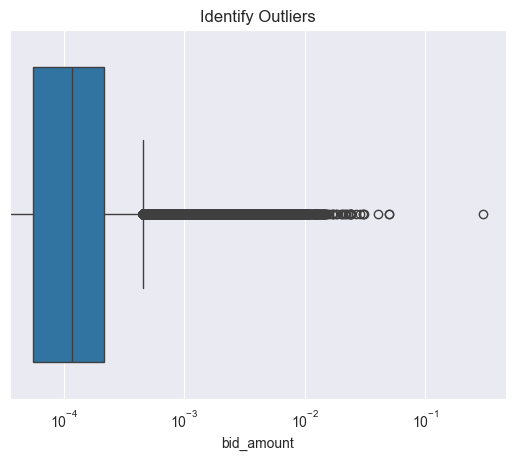

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.
phantom_nulls = ['null', 'Null', 'NULL', 'na', 'NA', 'NaN', 'none', 'None', '', ' ', 'NaN']
df_cleaned.replace(phantom_nulls, pd.NA, inplace=True)

# 2.  Not really sure what the issue of the datetime (also, which one of the datetimes???) is, but let's say it's the missing values
df_cleaned['is_install'] = df_cleaned['is_install'].astype('boolean')
df_cleaned['event_datetime'] = pd.to_datetime(df_cleaned['event_datetime'], errors='coerce')
df_cleaned['request_datetime'] = pd.to_datetime(df_cleaned['request_datetime'], errors='coerce')

invalid_request_datetime = df_cleaned['is_install'] & df_cleaned['event_datetime'].notna() & df_cleaned['request_datetime'].isna() 
df_cleaned.loc[invalid_request_datetime, 'request_datetime'] = df_cleaned.loc[invalid_request_datetime, 'event_datetime']

invalid_event_datetime = df_cleaned['is_install'] & df_cleaned['request_datetime'].notna() & df_cleaned['event_datetime'].isna()
df_cleaned.loc[invalid_event_datetime, 'event_datetime'] = df_cleaned.loc[invalid_event_datetime, 'request_datetime']

invalid_dates = df_cleaned['is_install'] & df_cleaned['event_datetime'].isna() & df_cleaned['request_datetime'].isna()
df_cleaned = df_cleaned[~invalid_dates].copy()

# 3.
df_cleaned[['advertiser_id', 'creative_id', 'pub_network_id']] = df_cleaned[['advertiser_id', 'creative_id', 'pub_network_id']].astype('Float64').astype('Int64')
df_cleaned['line_item_id'] = df_cleaned['line_item_id'].astype('Int64')
df_cleaned[['asi_0', 'publisher_id_str']] = df_cleaned[['asi_0', 'publisher_id_str']].astype('string')
df_cleaned[['requested_content_type', 'requested_size', 'country', 'city', 'os_name', 'os_version', 'device_type', 'auction_type', 'source']] = (
    df_cleaned[['requested_content_type', 'requested_size', 'country', 'city', 'os_name', 'os_version', 'device_type', 'auction_type', 'source']].astype('category'))

df_cleaned[['bid_amount', 'user_hour']] = df_cleaned[['bid_amount', 'user_hour']].astype('Float64')
print(df_cleaned.dtypes)

#print(df_cleaned.describe(include='all'))
# 4.
sns.boxplot(data=df_cleaned, x='bid_amount')
plt.xscale('log')
plt.title("Identify Outliers")
plt.show()

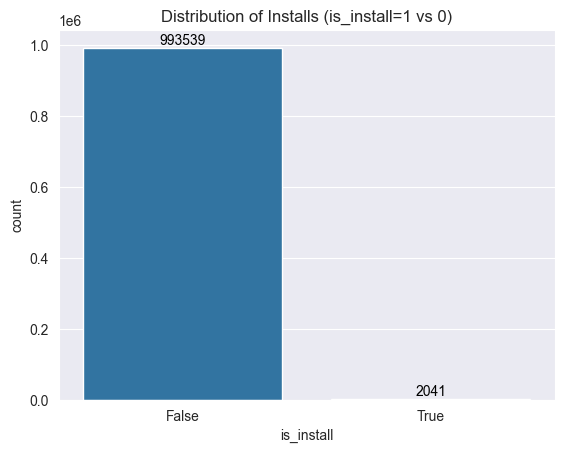

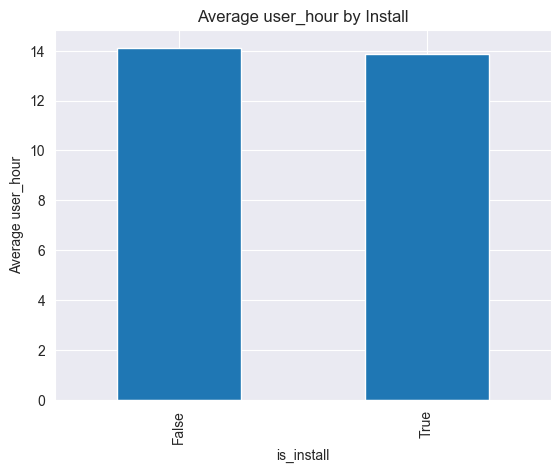

C:\Users\simao\AppData\Local\Temp\ipykernel_4776\11940993.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  install_rates = is_install_analysis.groupby(column)['is_install'].mean()


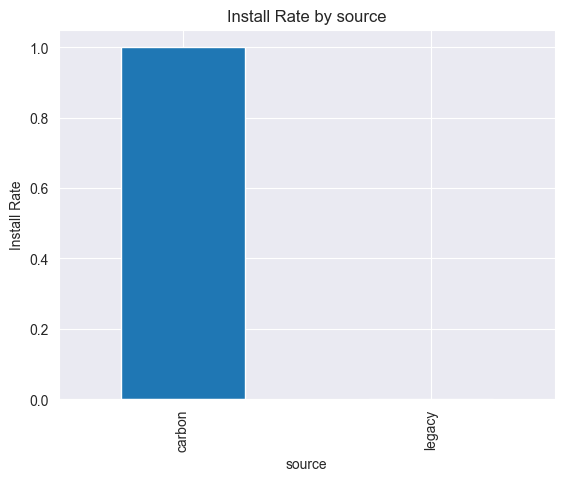

C:\Users\simao\AppData\Local\Temp\ipykernel_4776\11940993.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_install_analysis['day_of_week'] = is_install_analysis['event_datetime'].dt.dayofweek


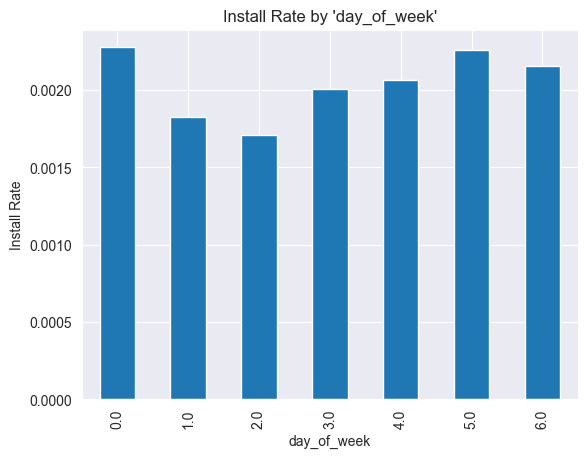

<Axes: >

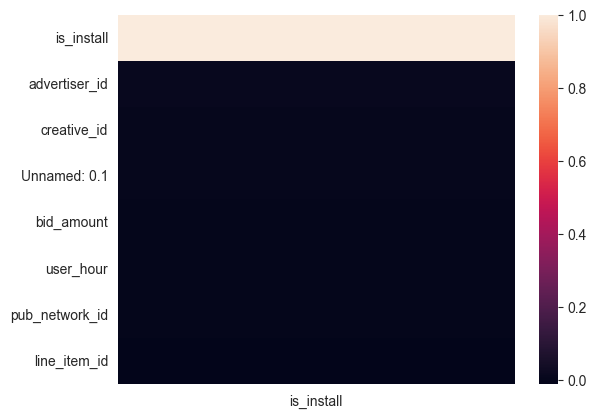

In [87]:
# 5.
# Drop rows where is_install is NA
is_install_analysis = df_cleaned.dropna(subset=['is_install'])

# a) Distribution of installs
plt.figure()
ax = sns.countplot(data=is_install_analysis, x='is_install')
plt.title("Distribution of Installs (is_install=1 vs 0)")

# Add count labels on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# b) Analyze differences between installs and non-installs
## user_hour, bid_amount: barely any impact of is_install (means are basically the same)
plt.figure()
is_install_analysis.groupby('is_install')['user_hour'].mean().plot(kind='bar')
plt.title("Average user_hour by Install")
plt.ylabel("Average user_hour")
plt.xlabel("is_install")
plt.show()

## country: the install rates are way higher in countries like PL and RU
## device_type: the install rates are basically the double for Tablets in comparison to Phones
## requested_content_type: installs ONLY happen for banners (not for html or native)
## source: installs also ONLY happen for carbon sources (not for legacy sources)
column = 'source'
plt.figure()
install_rates = is_install_analysis.groupby(column)['is_install'].mean()
install_rates.plot(kind='bar')
plt.title(f"Install Rate by {column}")
plt.ylabel("Install Rate")
plt.show()

# c) (extra) Analyse by day of the week
is_install_analysis['day_of_week'] = is_install_analysis['event_datetime'].dt.dayofweek
plt.figure()
install_rates = is_install_analysis.groupby('day_of_week')['is_install'].mean()
install_rates.plot(kind='bar')
plt.title(f"Install Rate by 'day_of_week'")
plt.ylabel("Install Rate")
plt.show()
## Conclusion: Irrelevant for analysis

# d) Model preparation
from sklearn.model_selection import train_test_split
X = is_install_analysis.drop(columns=['is_install'])  # Features
y = is_install_analysis['is_install']                 # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
## Handle imbalance (is_install is rarely True)
#from imblearn.over_sampling import SMOTE
#smote = SMOTE()
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
## Not working -> we would need to first handle the missing values / incorrect values (Na)

# e) Correlation with is_install
sns.heatmap(df_cleaned.corr(numeric_only=True)[['is_install']].sort_values('is_install', ascending=False))

## 2. Show the summary statistics for **numeric** columns and provide a simple description

* currently there's no numeric data, you'll need to process it and convert the columns to numeric types like int32, int64, float32, or float64

In [88]:
import numpy as np

# Show the summary statistics for numeric columns
numeric_summary = df_cleaned.describe(include=np.number).T
print(numeric_summary)

                   count             mean            std         min  \
Unnamed: 0.1    996372.0    528031.895106   304816.61547         0.0   
advertiser_id   995589.0  88362244.971258  196787.215926  87038592.0   
line_item_id    995571.0  88459451.408946  124755.035645         0.0   
creative_id     995575.0  88330601.671917   202911.94298         0.0   
pub_network_id  995576.0   85340777.60907  3633763.42457  73494051.0   
bid_amount      995552.0         0.000183       0.000444         0.0   
user_hour       995617.0        14.123387       5.797893         0.0   

                       25%         50%         75%         max  
Unnamed: 0.1     263971.75    528101.5   792031.25   1055869.0  
advertiser_id   88358930.0  88370177.0  88460602.0  88560110.0  
line_item_id    88406283.0  88483504.0  88518045.0  88560122.0  
creative_id     88144317.0  88411822.0  88462038.0  88560119.0  
pub_network_id  83657481.0  86452228.0  87033773.0  88445356.0  
bid_amount        0.000055    0.0

## 3. Show the summary statistics for **non numeric** columns and provide a simple description

* currently there's no numeric data, so, all columns are non numeric as shown above. 

In [91]:
import numpy as np

# Show the summary statistics for non-numeric columns
non_numeric_summary = df_cleaned.describe(exclude=np.number).T
print(non_numeric_summary)

                         count  unique                                   top  \
event_datetime          995572     NaN                                   NaN   
asi_0                   985145     138                           taboola.com   
publisher_id_str        995598    4814      dfe1f5bcc944456992197efe8cfce879   
impression_id           995643  995643  f773f425-0ab8-456e-b305-28e9643f0b92   
request_datetime        995604     NaN                                   NaN   
requested_content_type  995590       3                                  html   
requested_size          995590     401                                320x50   
publisher_bundle        995597    6806                            1617391485   
country                 995536      22                                    US   
city                    996285   21898                               Chicago   
os_name                 995617       2                                   iOS   
os_version              995617      16  

Before choosing which non-numeric variables to analyze, we found important to take a look into all of them (Exploratory Data Analysis). With this analysis, we decided to move foward with "country".

In [92]:
#Focus on country column
country_value_counts = df_cleaned['country'].value_counts(dropna=False)
print(country_value_counts)

country_description = df_cleaned['country'].describe()
print(country_description)

country
US     740579
CA      50715
BR      32602
BY      31456
DE      29132
JP      21120
KR      19533
AU      15284
SA      14493
FR       9757
GB       6308
UZ       6202
ES       4499
MX       4453
IT       2297
SE       1543
PT       1524
AT       1424
CH       1222
RU        894
NaN       836
NL        446
PL         53
Name: count, dtype: int64
count     995536
unique        22
top           US
freq      740579
Name: country, dtype: object


The country variable is a categorical variable that indicates the geographical location (country) where the advertising event occured. 
There are 22 distinct values represented in the dataset, which now includes NaN (missing values) as a distinct category. This means country information is available for most records, but some are missing (836). The most frequent country is US, as it appears more than 740.579 times across the registers, followed by Canada (50.715) and Brazil (32.602). On the less frequent countries, we have Poland with just 53 occurences. Also Russia only has 894 occurrences, which also gives us an insight that this lack of data (small samples) for these countries might influence them being dispersed from the rest when it came to the is_install rates.
The variable 'country' keeps showing a significant geographic imbalance, with event occuring predominantly in the US. This strong skew is a crucial factor to consider when analyzing the data or building models, as patterns or model performance might differ considerably across regions.